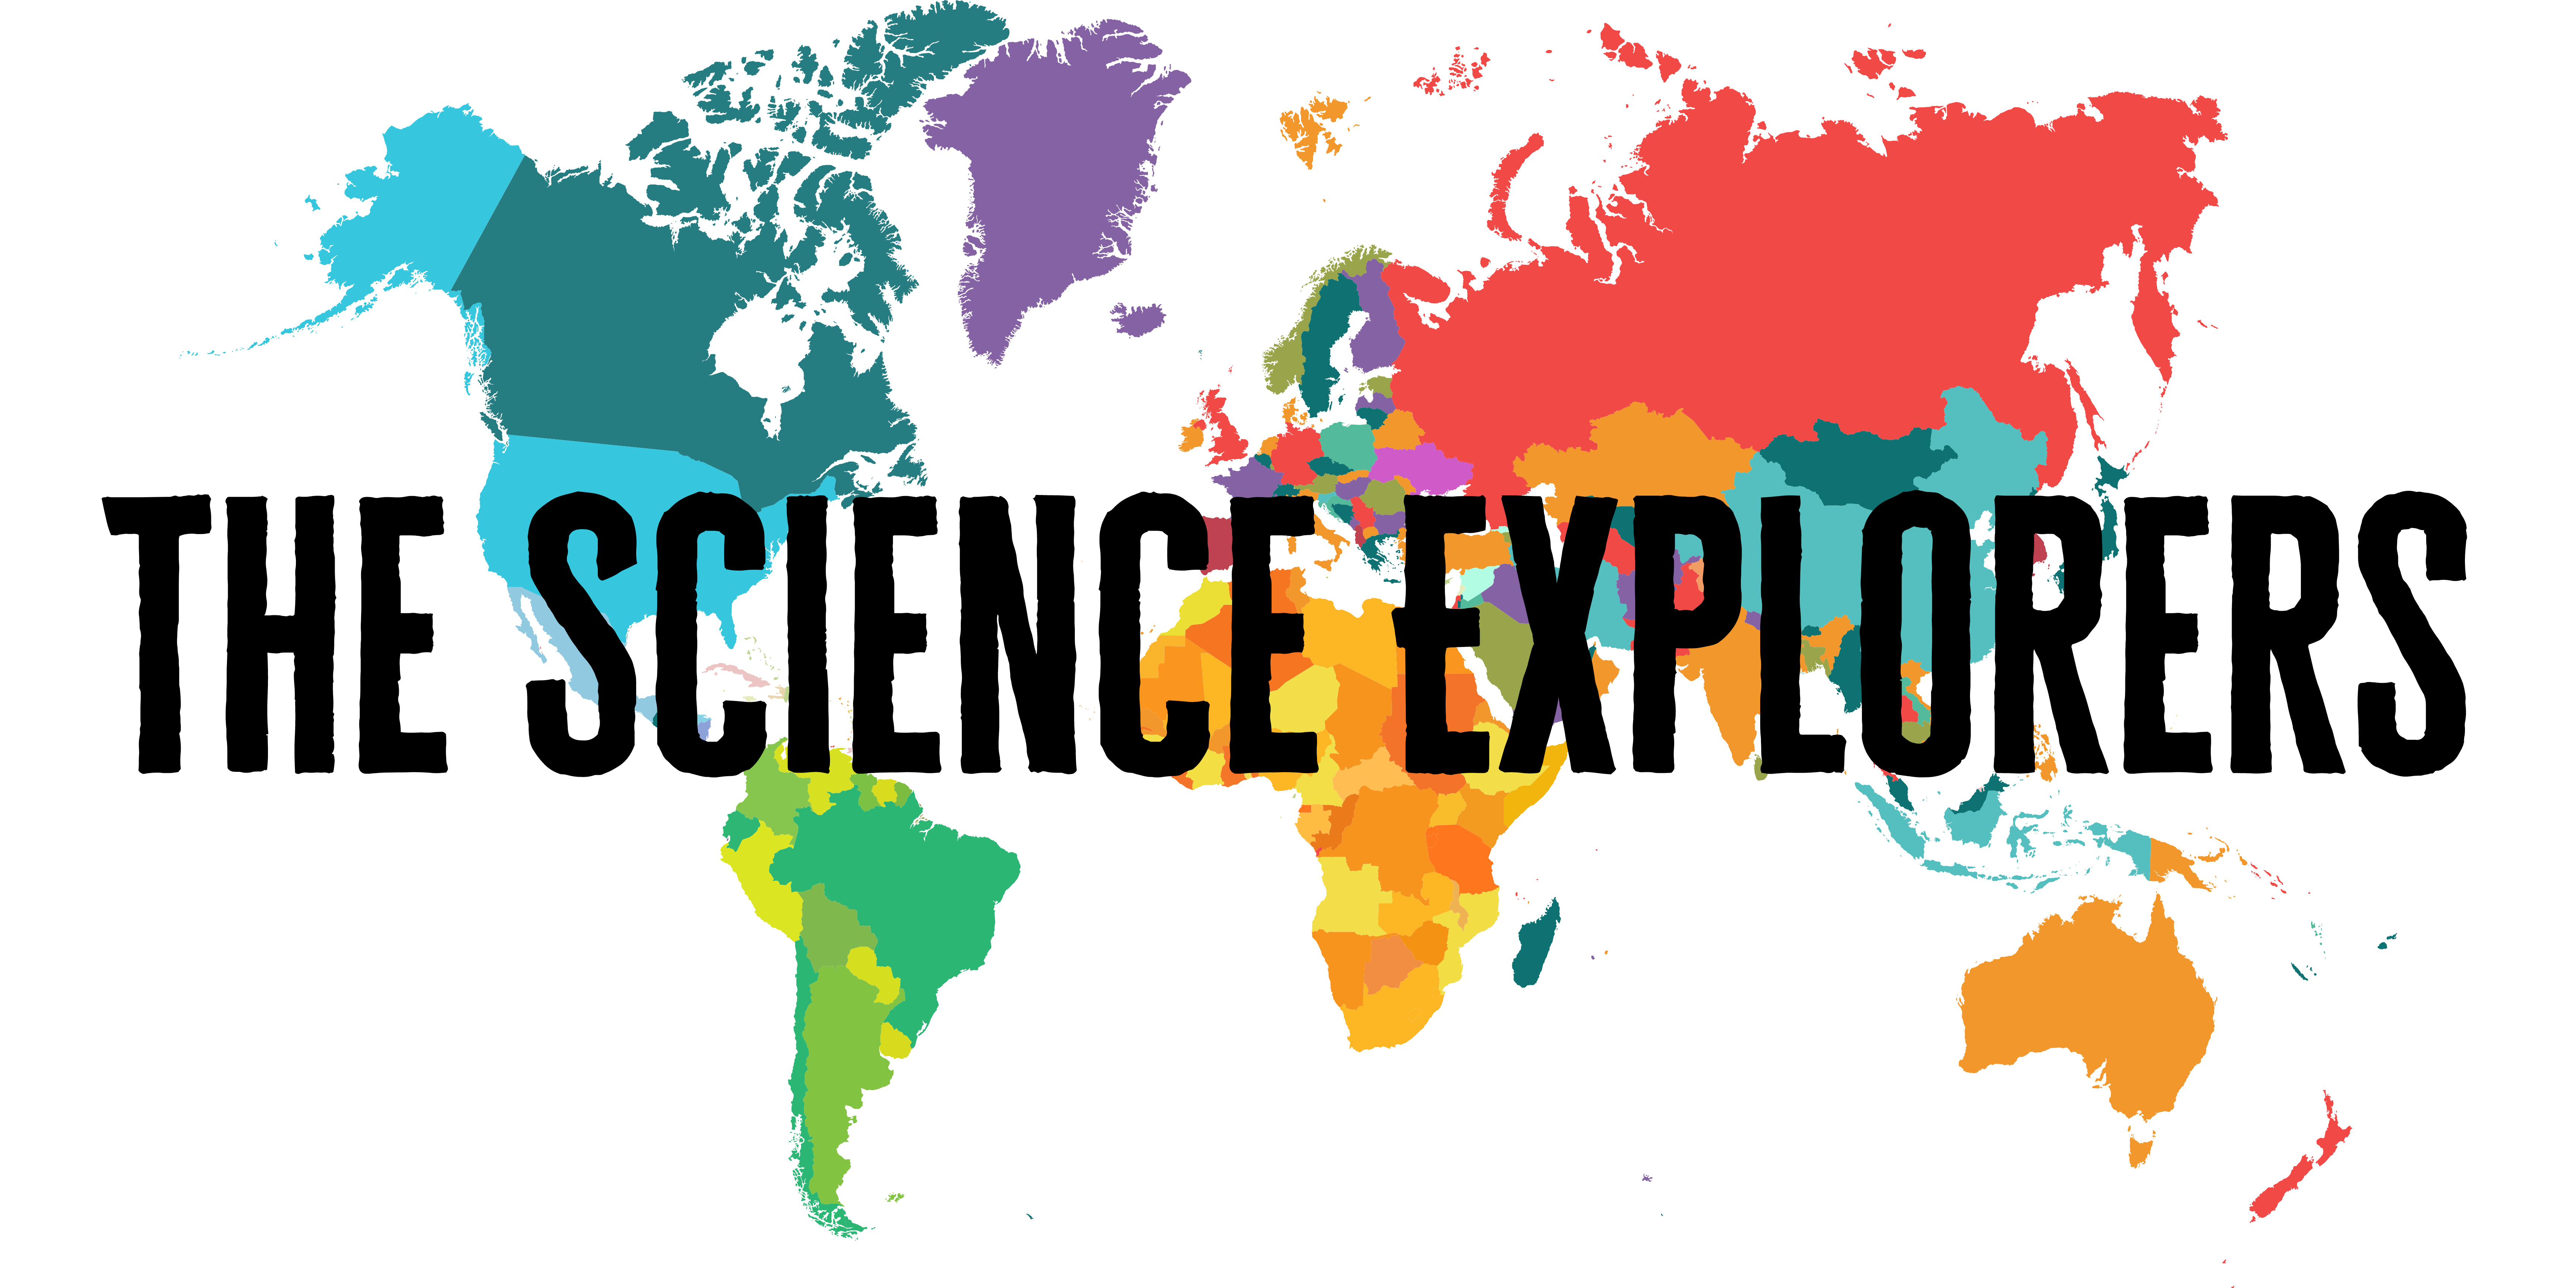

**By: Jessenia Lorenzo, Melissa Gonzalez, & Borly Green**

## **Importing Libraries**

#### Installing Anaconda Packages and Updating them for multiple data explorer and analysis options.

In [ ]:
# If running in Google Colab
pip install -q condacolab

In [ ]:
# If running in Google Colab
import condacolab
condacolab.install()

In [ ]:
# If running in Google Colab
from google.colab import files

In [ ]:
!pip install mapbox

In [ ]:
!conda install geopandas

In [ ]:
pip install geopandas

In [ ]:
pip install geoplot

In [ ]:
pip install earthpy

In [ ]:
pip install plotly

In [ ]:
pip install folium

In [1]:
import numpy as np
import pandas as pd
import matplotlib 
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import folium
from folium import Choropleth
from folium.plugins import HeatMap
import datetime
import shapely as sp
from shapely.geometry import Point, Polygon, box
import io
np.random.seed(0)
import os

##### **Download missing libraries is very simple. Simply type (example) pip install shapely**

##### Uploading the Earthquake Dataset into Google Colab So that everyone can work with. 
##### **However**, here is the link for when runtime expires, please download, save as EQ.csv for the earthquake dataset and TP.csv for the tectonic. [2 Datasets - Earthquake and Tectonic Plates](https://www.kaggle.com/karnikakapoor/earthquakes-and-tectonic-plates-seismic-analysis/data). Go under the **data** tab to the right of notebook, dowload these two and save as **EQ.csv and TP.csv**. Then, to your left of this notebook, click the **folder** and upload the two datasets and **rename** them. Then, you may **run** this code to view and **load the datasets.**

In [2]:
from google.colab import files 
uploaded = files.upload()

ModuleNotFoundError: No module named 'google'

## Load **FIRST** Earthquake data was uploaded directly into the Google Drive Colab Files (look to your left)

In [2]:
Earthquake = pd.read_csv('EQ.csv')

In [3]:
Earthquake.head()

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic


##**Drop *Everything* that is Missing** *italicized text*

In [4]:
missing_values_columns = [col for col in Earthquake.columns
                          if Earthquake[col].isnull().any()]
Earthquakes = Earthquake.drop(missing_values_columns, axis=1)
Earthquakes.head()

,Date,Time,Latitude,Longitude,Type,Depth,Magnitude,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,6.0,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,5.8,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,6.2,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,5.8,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.938,126.427,Earthquake,15.0,5.8,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic


In [5]:
EQ = pd.DataFrame(Earthquake,columns=['Date', 'Time', 'Latitude', 'Longitude', 'Magnitude'])
EQ

,Date,Time,Latitude,Longitude,Magnitude
0,01/02/1965,13:44:18,19.2460,145.6160,6.0
1,01/04/1965,11:29:49,1.8630,127.3520,5.8
2,01/05/1965,18:05:58,-20.5790,-173.9720,6.2
3,01/08/1965,18:49:43,-59.0760,-23.5570,5.8
4,01/09/1965,13:32:50,11.9380,126.4270,5.8
...,...,...,...,...,...
23407,12/28/2016,08:22:12,38.3917,-118.8941,5.6
23408,12/28/2016,09:13:47,38.3777,-118.8957,5.5
23409,12/28/2016,12:38:51,36.9179,140.4262,5.9
23410,12/29/2016,22:30:19,-9.0283,118.6639,6.3


In [6]:
TectonicPlates = pd.read_csv('TP.csv')

In [7]:
TectonicPlates.head

<bound method NDFrame.head of       plate     lat      lon
0        am  30.754  132.824
1        am  30.970  132.965
2        am  31.216  133.197
3        am  31.515  133.500
4        am  31.882  134.042
...     ...     ...      ...
12316    yz  19.713  113.274
12317    yz  19.288  113.517
12318    yz  18.863  113.759
12319    yz  18.438  114.000
12320    yz  18.438  114.000

[12321 rows x 3 columns]>

In [8]:
missing_values_columns = [col for col in TectonicPlates.columns
                          if TectonicPlates[col].isnull().any()]
TectonicPlates = TectonicPlates.drop(missing_values_columns, axis=1)
TectonicPlates.head()

,plate,lat,lon
0,am,30.754,132.824
1,am,30.970,132.965
2,am,31.216,133.197
3,am,31.515,133.500
4,am,31.882,134.042


# **Tectonic Plates Plot**

Text(0, 0.5, 'Latitude')

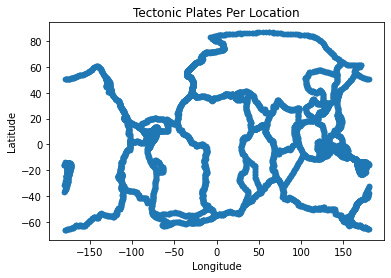

In [9]:
Plot = TectonicPlates.plot.scatter(x='lon', y='lat')
Plot.set_title("Tectonic Plates Per Location")
Plot.set_xlabel("Longitude")
Plot.set_ylabel("Latitude")

# **Earthquake Plot**


Text(0, 0.5, 'Latitude')

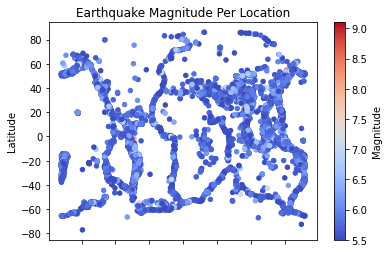

In [10]:
Plot = EQ.plot.scatter(x='Longitude', y='Latitude', c='Magnitude', cmap='coolwarm')
Plot.set_title("Earthquake Magnitude Per Location")
Plot.set_xlabel("Longitude")
Plot.set_ylabel("Latitude")

##### From the the plots above, we observe that Earthquakes and Tectonic Plates are directly correlated. There are a few Earthquakes that occured in vicinity to the plates. The Longitudes and Latitudes prove so. In addition, click on [Jessenia's Tableau Profile](https://https://public.tableau.com/app/profile/jessenia.o.lorenzo), and take a look at EQ-Magnitudes-Locations, Earthquake-Tableau-2, and Earthquake-Tableau-1 so that you may observe the matches on our Python graphs as well as in Tableau. It's also helpful to see, although not the exact years, on [Google Trend](https://https://trends.google.com/trends/explore?date=all&q=earthquake,tsunami,%2Fg%2F11bwn3t3mb), how Earthquakes and Tsunamis are correlated (which often occur as a result of these Earthquakes). Thank you!

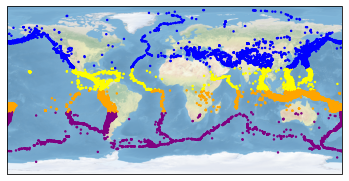

In [11]:
# Generate data points on a stock image map to see the number of earthquakes by zone.
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import matplotlib.path as mpath
import cartopy.feature as cfeature
import seaborn as sns

earthquakes = pd.read_csv('earthquakes.csv')

ax = plt.axes(projection=ccrs.PlateCarree()) #also try LambertConformal
ax.stock_img()

# Color by Latitude Zone
colors = {'Northern' : 'blue', 'Tropic of Cancer' : 'yellow' , 'Equator': 'red', 'Tropic of Capricorn' : 'orange', 'Southern' : 'purple'}

ax.scatter(
   earthquakes['Longitude'],
   earthquakes['Latitude'],
   s = 2,
   c=earthquakes['TropicZone'].map(colors)
   )


plt.show()

In [12]:
# To show number of earthquakes in each zone shown above
print (earthquakes.groupby(['TropicZone']).size())

TropicZone
Equator                   1
Northern               6248
Southern               4121
Tropic of Cancer       4369
Tropic of Capricorn    8673
dtype: int64


+ Slighly surprising results about the number of earthquakes in each zone. The lower tropics did have much more earthquakes than any other zone, but the northern tropics actually had less earthquakes than either the Northern zone or the southern Tropics. The Southern Zone had a similar amount of earthquakes as the northern tropics.

In [13]:
TectonicPlates.head()

,plate,lat,lon
0,am,30.754,132.824
1,am,30.970,132.965
2,am,31.216,133.197
3,am,31.515,133.500
4,am,31.882,134.042


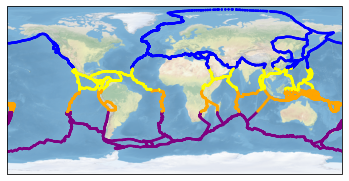

In [14]:
# Map of Plate Boundaries
ax = plt.axes(projection=ccrs.PlateCarree())
ax.stock_img()

# Color by Latitude Zone
colors = np.where(TectonicPlates['lat'] < -23.5, 'purple',
         np.where((TectonicPlates['lat'] >= -23.5) & (TectonicPlates['lat'] <= 0), 'orange', 
         np.where((TectonicPlates['lat'] > 0) & (TectonicPlates['lat']<=23.5), 'yellow', 
         np.where(TectonicPlates['lat'] > 23.5, 'blue', 'black'))))

plt.scatter(
   TectonicPlates['lon'],
   TectonicPlates['lat'],
   s = 2,
   c=colors
   )


plt.show()

In [15]:
# 
TectonicPlates['lon2'] = TectonicPlates['lon'].shift(-1)
TectonicPlates['lat2'] = TectonicPlates['lat'].shift(-1)


from numpy import cos, sin, arcsin, sqrt
from math import radians

def haversine(row):
    lon1 = row['lon']
    lat1 = row['lat']
    lon2 = row['lon2']
    lat2 = row['lat2']
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * arcsin(sqrt(a)) 
    km = 6367 * c
    return km

TectonicPlates['distance'] = TectonicPlates.apply(haversine, axis=1)
TectonicPlates

,plate,lat,lon,lon2,lat2,distance
0,am,30.754,132.824,132.965,30.970,27.514513
1,am,30.970,132.965,133.197,31.216,35.138223
2,am,31.216,133.197,133.500,31.515,43.938305
3,am,31.515,133.500,134.042,31.882,65.492548
4,am,31.882,134.042,134.691,32.200,70.612301
...,...,...,...,...,...,...
12316,yz,19.713,113.274,113.517,19.288,53.650956
12317,yz,19.288,113.517,113.759,18.863,53.632531
12318,yz,18.863,113.759,114.000,18.438,53.613210
12319,yz,18.438,114.000,114.000,18.438,0.000000


In [16]:
PlateBoundaryDistNorthern = TectonicPlates.loc[TectonicPlates['lat'] > 23.5, 'distance'].sum()
PlateBoundaryDistTropicCancer = TectonicPlates.loc[(TectonicPlates['lat'] > 0) & (TectonicPlates['lat'] <=23.5), 'distance'].sum()
PlateBoundaryDistTropicCapricorn = TectonicPlates.loc[(TectonicPlates['lat'] <= 0) & (TectonicPlates['lat'] >= -23.5), 'distance'].sum()
PlateBoundaryDistTropicSouthern = TectonicPlates.loc[TectonicPlates['lat'] > -23.5, 'distance'].sum()

In [17]:
print(PlateBoundaryDistNorthern)

218487.70229451937


In [18]:
print(PlateBoundaryDistTropicCancer)

298232.4237275835


In [19]:
print(PlateBoundaryDistTropicCapricorn)

268194.1591630462


In [20]:
print(PlateBoundaryDistTropicSouthern)

784914.2851851492


In [21]:
TectonicPlates

,plate,lat,lon,lon2,lat2,distance
0,am,30.754,132.824,132.965,30.970,27.514513
1,am,30.970,132.965,133.197,31.216,35.138223
2,am,31.216,133.197,133.500,31.515,43.938305
3,am,31.515,133.500,134.042,31.882,65.492548
4,am,31.882,134.042,134.691,32.200,70.612301
...,...,...,...,...,...,...
12316,yz,19.713,113.274,113.517,19.288,53.650956
12317,yz,19.288,113.517,113.759,18.863,53.632531
12318,yz,18.863,113.759,114.000,18.438,53.613210
12319,yz,18.438,114.000,114.000,18.438,0.000000


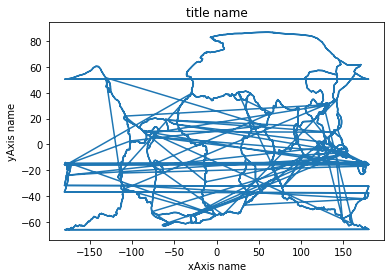

In [22]:
plt.plot(TectonicPlates['lon'],TectonicPlates['lat'])
plt.title('title name')
plt.xlabel('xAxis name')
plt.ylabel('yAxis name')
plt.show()

In [25]:
import numpy as np
import matplotlib.pyplot as py
from matplotlib import animation

#py.close('all') # close all previous plots

# create a random line to plot
#------------------------------------------------------------------------------

x = TectonicPlates['lon']
y = TectonicPlates['lat']

py.figure(1)
py.scatter(x, y, s=10)
py.axis([-180, 190, -90, 90])
py.show()

# animation of a scatter plot using x, y from above
#------------------------------------------------------------------------------

fig = py.figure(2)
ax = py.axes(xlim=(-180, 190), ylim=(-90, 90))
scat = ax.scatter([], [], s=10)

def init():
    scat.set_offsets([])
    return scat,

def animate(i):
    data = np.hstack((x[:i,np.newaxis], y[:i, np.newaxis]))
    scat.set_offsets(data)
    return scat,

anim = animation.FuncAnimation(fig, animate, init_func=init, frames=len(x)+1, 
                               interval=200, blit=False, repeat=True)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [26]:
TectonicPlates.plate.unique()

array(['am', 'an', 'AP', 'ar', 'AS', 'AT', 'au', 'BH', 'BR', 'BS', 'BU',
       'ca', 'CL', 'co', 'cp', 'CR', 'EA', 'eu', 'FT', 'GP', 'in', 'jf',
       'JZ', 'KE', 'lw', 'MA', 'MN', 'MO', 'mq', 'MS', 'na', 'NB', 'ND',
       'NH', 'NI', 'nu', 'nz', 'OK', 'ON', 'pa', 'PM', 'ps', 'ri', 'sa',
       'SB', 'sc', 'SL', 'sm', 'sr', 'SS', 'su', 'sw', 'TI', 'TO', 'WL',
       'yz'], dtype=object)

In [27]:
TectonicPlates['dist'] = \
    np.concatenate(TectonicPlates.groupby('plate')
                     .apply(lambda x: haversine(x['lat'], x['lon'],
                                                x['lat'].shift(), x['lon'].shift())).values)

TypeError: haversine() takes 1 positional argument but 4 were given